# Funktioner, fits og usikkerheder i Python


I denne note vil vi introducere jer til funktioner, hvordan man fitter en model til data og behandler usikkerheder i Python. 

## Funktioner

Før vi kan fitte en funktion med Python skal vi kunne definere en funktion. En funktion er et meget bredt begreb i Python, og man kan rigtig meget med dem. Fordelen ved funktioner er, at man kan samle kode, som man bruger mange gange, så det kan gøre større projekter meget overskuelige. På nuværende tidspunkt er den primære brug af funktioner dog, at vi skal bruge dem til at fitte. 

Man definerer en funktion ved at skrive 
```python
def FUNKTION_NAVN(INPUTS):
    __Udregninger__
    return OUTPUT
```
Så en funktion bliver nu primært defineret ved input og outputtet af denn, hvor der så ligger en del udregninger imellem. Et eksempel kan ses nedenfor:

In [3]:
def E_kin(m,v):
    return 1/2 * m * v**2

Her har jeg defineret en funktion som jeg kalder E_kin, den tager 2 argumenter, m og v, og returnerer $ \frac{1}{2}  m v^2$. Den kan vi så prøve af for m = 80 og v = 5

In [4]:
print(E_kin(80,5))

1000.0


Funktioner kan også bruges til at gøre kode mere overskuelig og nemmere at debugge. Her er der fx defineret en funktion som laver et plot. Den tager ingen værdier og retunerer heller ikke noget, men er nem at debugge og man kan lade være med at kalde den, når man har fået sit plot.

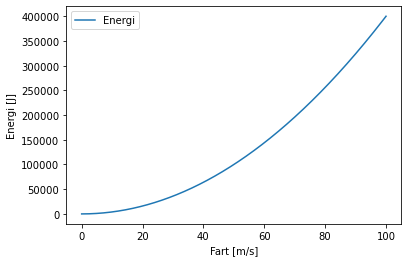

In [5]:
import numpy as np

v_data = np.linspace(0,100,1000)
E_data = E_kin(80,v_data)

def plot_E_kin():
    import matplotlib.pyplot as plt
    plt.plot(v_data,E_data, label = 'Energi')
    plt.xlabel('Fart [m/s]')
    plt.ylabel('Energi [J]')
    plt.legend()
    plt.show()
    plt.close('all')

plot_E_kin()

## Fitting

Vi skal nu bruge funktioner til at fitte en model til data. Her bruger vi optimize.curve_fit. Denne kommer fra pakken SciPy og importeres således:

In [6]:
from scipy.optimize import curve_fit

For at fitte en model skal man have noget data at fitte til. Her bruger jeg den data der lå på jeres første Python aflevering.

In [7]:
data = np.array([
    [0.19,1.98,2.05,2.16,2.16,2.07],
    [0.3,2.61,2.6,2.58,2.81,2.68],
    [0.36,3,3,3,2.87,2.97],
    [0.53,3.47,3.83,3.54,3.6,3.5],])
print(data)

[[0.19 1.98 2.05 2.16 2.16 2.07]
 [0.3  2.61 2.6  2.58 2.81 2.68]
 [0.36 3.   3.   3.   2.87 2.97]
 [0.53 3.47 3.83 3.54 3.6  3.5 ]]


For at fitte en model til data, skal man have ét datapunkt for hver varieret måling. Her har vi 5 målinger per pendullængde, derfor skal vi altså tage gennemsnit af vores svingningstider.

In [8]:
L = data[: , 0] #udvælger kolonnen med pendullængde
svingningstider = data[:,1:5] #her udvælger vi de fire kolonner  med svingningstider

gns_svingning = np.mean(svingningstider, axis = 1) #tager gennemsnit af svingningstiderne, "axis" angiver om vi går vandret eller lodret i datasættet

print(L)
print(gns_svingning)

[0.19 0.3  0.36 0.53]
[2.0875 2.65   2.9675 3.61  ]


Nu har vi to lister med datapunkter, der hænger sammen, og vi kan begynde at undersøge hvilket fit vi skal bruge. Vi regner med at skulle bruge en lineær funktion, så vi skal have defineret det i vores kode. Vi kalder funktionen "linfunc", og angiver så variabel og parametre i parentes. I return skriver vi hvad funktionen skal give som resultat når vi bruger den.

In [9]:
def linfunc(x, a, b):
    y = a*x + b
    return y

Når man fitter er det meget **vigtigt** at det første argument i ens funktion, her x, er det som man har data på og vil have Python til at fitte efter, ellers fungerer fittet ikke. Dette er en fejl som ofte opstår, så hvis I får en fejl så tjek lige om i har det rigtige stående som det første I jeres parentes.

Når man så har en funktion defineret rigtigt, kan man fitte vores funktion til dataen med kommandoen `curve_fit()`. Funktionen `curve_fit` skal bruge funktionen, som vi ønsker at fitte, samt de tilhørende x- og y-værdier, som i dette tilfælde er pendullængde og svingningstid. Funktionen giver to outputs, først giver den fitte-parametrene, det vil sige fittets bedste bud på, hvad parametrene i fit-funktionen bør være. Dernæst giver den covariansen. Er der flere parametre angives covariansen som en matrix med flere værdier. Covariance-matrixen kan bruges til at finde ussikkerheder på fit parametre, men mere om det til sidst.

In [10]:
par, cov = curve_fit(linfunc, L , gns_svingning)
print(par) #printer parametrene
print(cov) #printer covariansen

[4.4553719  1.29164669]
[[ 0.08314673 -0.02868562]
 [-0.02868562  0.01115413]]


Nu kan vi plotte vores data sammen med vores fit og vurderer, hvor god vores model er. Vi skal selvfølgelig også have plottet vores usikkerheder, og da vi arbejder med gennemsnit vil vi plotte usikkerheden ved hjælp af standardafvigelsen på vores data. Man kan bruge NumPy funktionen np.std() til at bestemme standardafvigelse.

For at plotte vores fit laver vi et array af værdier i det interval, som vi gerne vil plotte med np.linspace funktionen. Vi bruger så disse værdier i vores lineære funktion, hvor vi bruger de parametre vores fit bestemte med `curve_fit`.

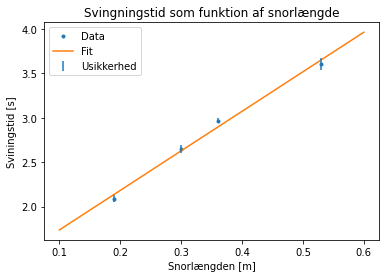

In [11]:
import matplotlib.pyplot as plt

afvigelse = np.std(svingningstider, axis = 1)/np.sqrt(len(svingningstider))

X = np.linspace(0.1,0.6,1000) #laver et array af 1000 jævnt fordelte tal mellem 0.1 og 0.6
Y = linfunc(X,par[0],par[1])  #laver et array af vores lineære fit på det ovenstående array

plt.plot(L , gns_svingning, '.', label = 'Data')
plt.plot(X,Y , label = 'Fit')
plt.errorbar(L , gns_svingning , yerr=afvigelse , fmt='none' , label = 'Usikkerhed')
plt.xlabel('Snorlængden [m]')
plt.ylabel('Sviningstid [s]')
plt.title("Svingningstid som funktion af snorlængde")
plt.legend()
plt.show()

Man kan også lave et fit, hvor der tages højde for usikkerheden på datapunkterne. Det gør man ved at angive et sigma når man bruger curve_fit. 

**Tip:** Husk at bruge `absolute_sigma = True` ellers for i problemer med jeres ussikerheder.

In [12]:
par_with_error, cov_new = curve_fit(linfunc, L , gns_svingning, sigma = afvigelse, absolute_sigma = True)
print(par_with_error)

[4.71061446 1.23176413]


Paremeterne er ikke ændret så meget da fejlen på punkterne er meget ens, men hvis der havde været stor forskel på usikkerhederne, ville det have en større effekt. Endeligt kan man så plotte punkter med usikkerheder og fit som tager højde for usikkerheden.

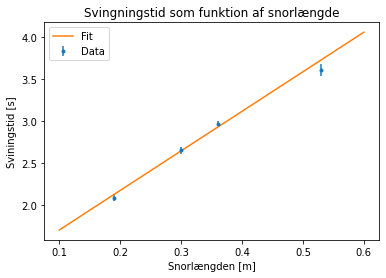

In [13]:
Y_2 = linfunc(X,par_with_error[0],par_with_error[1])

plt.errorbar(L , gns_svingning,yerr= afvigelse, fmt='.', label = 'Data')
plt.plot(X,Y_2 , label = 'Fit')
plt.xlabel('Snorlængden [m]')
plt.ylabel('Sviningstid [s]')
plt.legend()
plt.title("Svingningstid som funktion af snorlængde")
plt.show()

For at finde usikkerheden på de fittede parametre, kan man bruge covariance-matrixen. På dens diagonal er nemlig variansen for de fittede parametre. Når man har variansen kan man finde usikkerheden, da kvadratroden af variansen er ussikerheden. I Python kan det gøres med np.diagonal(), der når den får et matrix som indput retunerer en array med værdierne der lå på diagonalen af matrixen.

In [14]:
sigma = np.sqrt(np.diagonal(cov_new))
print(par[0], ' +/-' , sigma[0])
print(par[1], ' +/-' , sigma[1])
    

4.455371899695233  +/- 0.20677577950327602
1.2916466946051461  +/- 0.06888566119046889


Her er fit-værdierne for a og b printet med usikkerheder fundet fra covariance-matrixen. Husk at afrund til korrekt antal betydende cifrer.